# Pymaceuticals Inc.
---

### Analysis

- The analysis of the data demonstrates that two regimens outperformed all others for treatment of SCC tumors. Inital step for analysis was to remove any duplicates of data to provide an accurate analysis. The summary statistics were then caclculated for all drug regimens used in the treatments. It was evident in the summary table that the best regimens were Ramicane and Capomulin,respectively. This was further visibly demonstrated in the bar charts. The distribution if male vs female was almost evenly split in the analysis. The scatter distribution between the weight and the tumor volume showed that the larger the tumor the heavier the mouse. This correlates as tumor volume increases in mass.

- 
  Overall the best treatments for the mice with SCC tumors were Ramicane and Capomulin. Although, a ket note to point out is that mice on these two regimens received two more treatments on average than the other regimens. This would be an important observation to keep in mind in overall treatment selection.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import sklearn.datasets as dta
from scipy.stats import linregress
%matplotlib inline

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df
# Display the data table for preview
combined_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
5,a203,Infubinol,Female,20,23,25,56.793208,1
6,a203,Infubinol,Female,20,23,30,59.523197,1
7,a203,Infubinol,Female,20,23,35,61.931650,2
8,a203,Infubinol,Female,20,23,40,63.593490,2
9,a203,Infubinol,Female,20,23,45,67.973419,2


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# groupby ID and timepoint and get count of times
unique_mice=combined_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count().sort_values(ascending=False)

# reset the index and name group by column
unique_mice = unique_mice.reset_index(name='time_count')

# filter the duplicate out and find the unique mouse
unique_mice[unique_mice.time_count > 1]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Filter the original DataFrame for duplicate Timepoints
# Display the duplicate rows

combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df.loc[combined_df['Mouse ID']!='g989']
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
summary_stat=combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std','sem'])
summary_stat

summary_stat.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Unique Timepoints'>

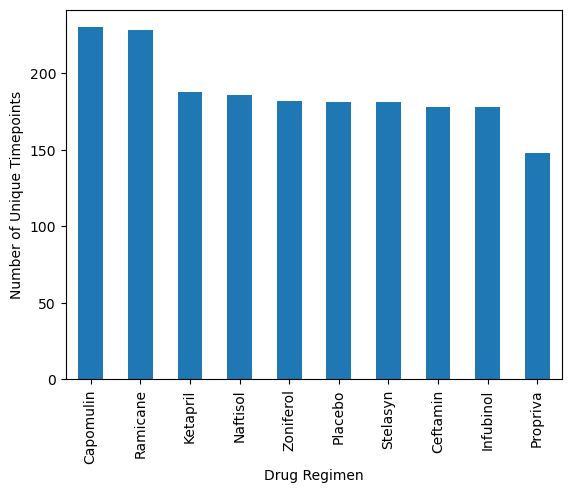

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_info=combined_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
timepoint_info.plot(kind='bar',xlabel='Drug Regimen',ylabel='Number of Unique Timepoints')
# plt.show

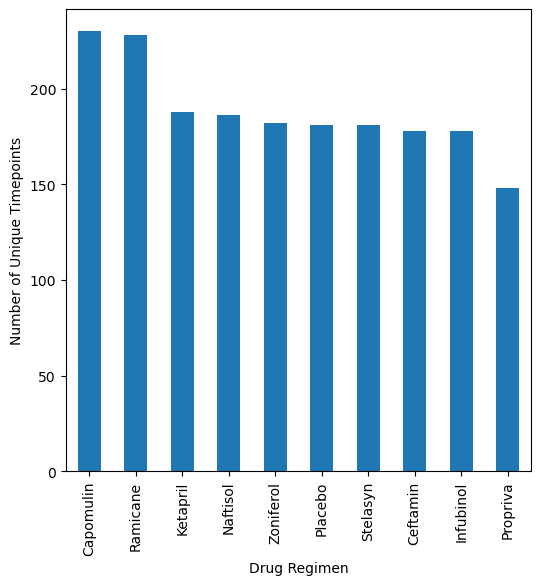

In [9]:
timepoint_info=combined_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
timepoint_info

mice=timepoint_info.plot(kind='bar', figsize=(6,6))

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Timepoints')
plt.show()

<Axes: title={'center': 'Distribution of Sex'}, ylabel='count'>

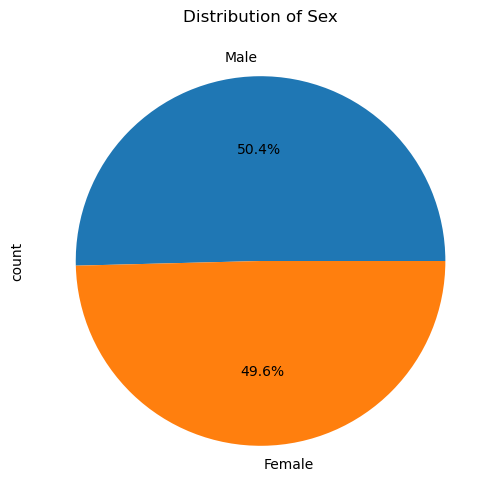

In [10]:
# get sex counts
sex_counts=combined_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# make pie chart
sex_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Distribution of Sex')

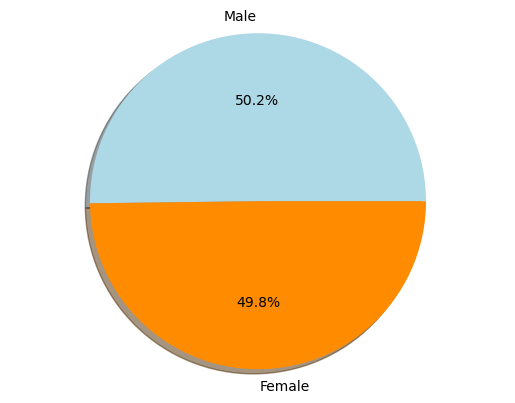

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# Make the pie chart
kind=['Male','Female']

kind_number=[125,124]

colors=['lightblue','darkorange']

explode=(0,0)

plt.pie(kind_number, explode=explode, labels=kind, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=combined_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.DataFrame(max_timepoint).reset_index()
max_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [13]:
max_timepoint_df.rename(columns={'Timepoint': 'Max_point'},inplace=True)
max_timepoint_df

,Mouse ID,Max_point
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [14]:
Tumor_volume=combined_df.merge(max_timepoint_df, how = 'left', on = 'Mouse ID')
Tumor_volume=Tumor_volume[Tumor_volume['Timepoint']==Tumor_volume['Max_point']]
Tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_point
9,a203,Infubinol,Female,20,23,45,67.973419,2,45
19,a251,Infubinol,Female,21,25,45,65.525743,1,45
29,a262,Placebo,Female,17,29,45,70.717621,4,45
39,a275,Ceftamin,Female,20,28,45,62.999356,3,45
46,a366,Stelasyn,Female,16,29,30,63.440686,1,30


In [16]:
Regimen= Tumor_volume[(Tumor_volume['Drug Regimen']=='Capomulin')|
(Tumor_volume['Drug Regimen']=='Ramicane')|
(Tumor_volume['Drug Regimen']=='Infubinol')|
(Tumor_volume['Drug Regimen']=='Ceftamin')]
Regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_point
9,a203,Infubinol,Female,20,23,45,67.973419,2,45
19,a251,Infubinol,Female,21,25,45,65.525743,1,45
39,a275,Ceftamin,Female,20,28,45,62.999356,3,45
66,a411,Ramicane,Male,3,22,45,38.407618,1,45
76,a444,Ramicane,Female,10,25,45,43.047543,0,45
...,...,...,...,...,...,...,...,...,...
1812,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1822,y793,Capomulin,Male,17,17,45,31.896238,2,45
1832,y865,Ceftamin,Male,23,26,45,64.729837,3,45
1849,z578,Ramicane,Male,11,16,45,30.638696,0,45


In [17]:
# only get treatments needed into a list
treatment = Regimen['Drug Regimen'].unique().tolist()
treatment

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [18]:
# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each treatment
for regimen in treatment:
    # Locate the rows which contain mice on each drug regimen and get the tumor volumes
    treatment_data = Regimen[Regimen['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] # SERIES
    
    # Add subset to the list (this can be used later for plotting)
    tumor_vol_data.append(treatment_data) # LIST
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Output the results for this treatment
    print(f"{regimen}:\n")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers.tolist()}\n")


Infubinol:

Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outliers: [36.3213458]

Ceftamin:

Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Outliers: []

Ramicane:

Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Outliers: []

Capomulin:

Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outliers: []



<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

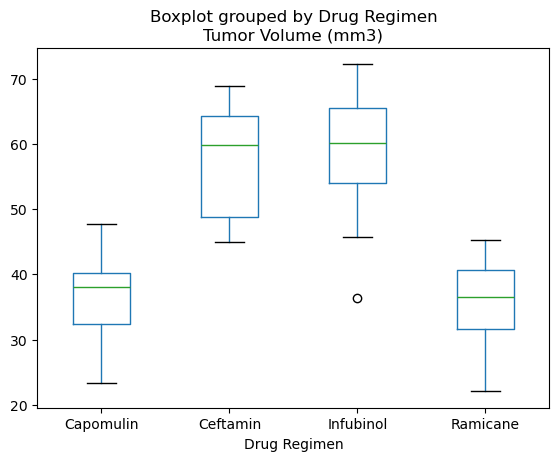

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
Regimen_box=Regimen[['Drug Regimen','Tumor Volume (mm3)']]
Regimen_box.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)

## Line and Scatter Plots

<Axes: title={'center': 'Mouse b128'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

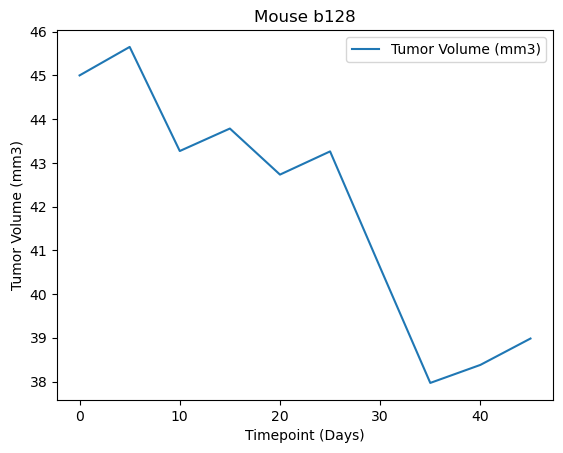

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capo=combined_df[(combined_df['Drug Regimen']=='Capomulin') & (combined_df['Mouse ID']=='b128')]
Capo
Capo_line=Capo.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', title='Mouse b128')
Capo_line.set_xlabel('Timepoint (Days)')
Capo_line.set_ylabel('Tumor Volume (mm3)')
Capo_line

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

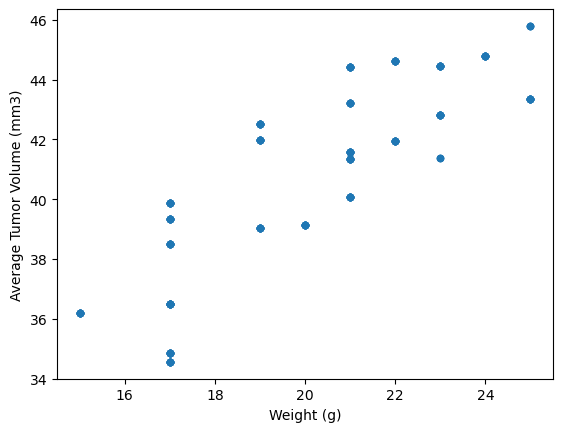

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# only get data for capomulin
scatter=combined_df[(combined_df['Drug Regimen']=='Capomulin')]

# get mean tumor vol per mouse
tumor_avg = scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# make a dataframe from groupby
tumor_avg=pd.DataFrame(tumor_avg).reset_index()

# renamed the new column
tumor_avg.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace=True)

# merge onto original df
scatter=scatter.merge(tumor_avg, how='left', on='Mouse ID')
scatter

# make scatter plot
scatter.plot(kind='scatter', x='Weight (g)', y= 'Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume is 0.83


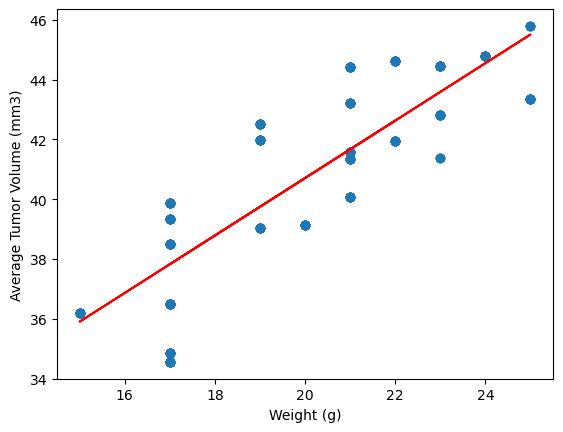

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = scatter['Weight (g)']
avg_vol = scatter['Average Tumor Volume (mm3)']

print(f"The correlation coefficient between mouse weight and average observed tumor volume is {round(st.pearsonr(weight,avg_vol)[0],2)}")

# Plot the different factors in a scatter plot
x_values = weight
y_values = avg_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()